## Problem Defination


The objective of this project is to analyze the dataset's result of past bank telemarketing campaign and perform machine learning algorithms for predicting valuable customers who will join a term deposit product. The dataset was taken from 2008 to 2013 and it had an imbalance data with the majority of negative result distribution. As the bank's data scientists, we decided to focus on minimizing False Negative Class.

Evaluation metric that we will use is Recall. Where we will minimize false negative class - where we predicted clients that will not open a term deposit, turns out they actually want to open a term deposit. As our objective is to have as many clients to open a term deposit, therefore increasing recall will decrease this type of error.



## BUSINESS CASE : to predict a successful term deposit so the Portugese bank can target the right client that will open a term deposit through a telemarketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data=pd.read_csv('bank-additional-full.csv',sep=';') 

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.head(pd.set_option('display.max_columns',None))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Domain Analysis

## Client Details

age :The age of the candidate (numeric)

job : Type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

marital : Marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

default: has credit in default? (categorical: "no","yes","unknown")

housing: has housing loan? (categorical: "no","yes","unknown")

loan: has personal loan? (categorical: "no","yes","unknown")

## The last contact of the current campaign:

contact: contact communication type (categorical: "cellular","telephone")

month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

duration: last contact duration, in seconds (numeric). this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

emp.var.rate: employment variation rate - quarterly indicator (numeric)

cons.price.idx: consumer price index - monthly indicator (numeric)

cons.conf.idx: consumer confidence index - monthly indicator (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):

y - has the client subscribed a term deposit? (binary: "yes","no")

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
data.shape

(41188, 21)

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Cheaking the Dataset

In [11]:
# Target class counts
data['y'].value_counts()


no     36548
yes     4640
Name: y, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'target variable')

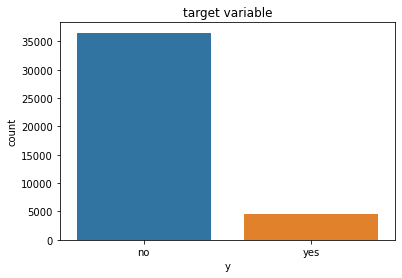

In [12]:
sns.countplot(data["y"])
plt.title("target variable")

In [13]:
print('Percent of No and Yes \n',data['y'].value_counts()/len(data)*100)

Percent of No and Yes 
 no     88.734583
yes    11.265417
Name: y, dtype: float64


## EDA

In [14]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [15]:
#there are some duplicated values there is no need to call the same person multiple times so it wills ave time and mone

In [16]:
data.drop_duplicates(keep='first',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

## Univariate analysis by categorical variable

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


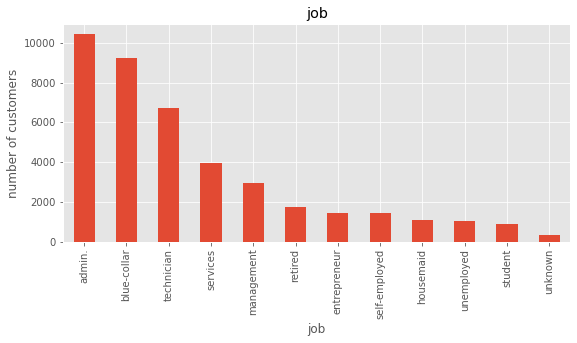

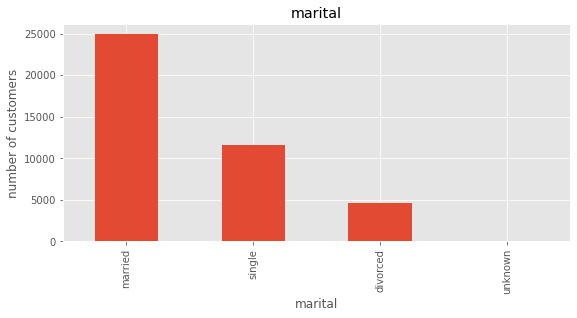

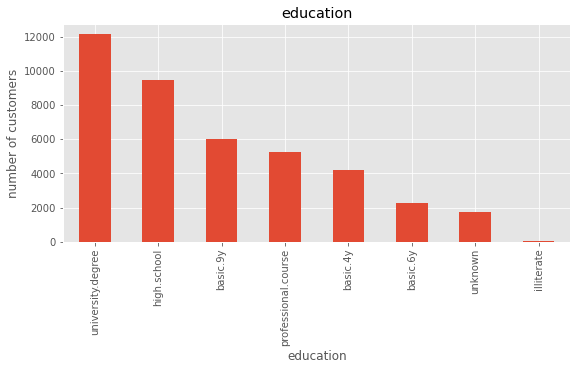

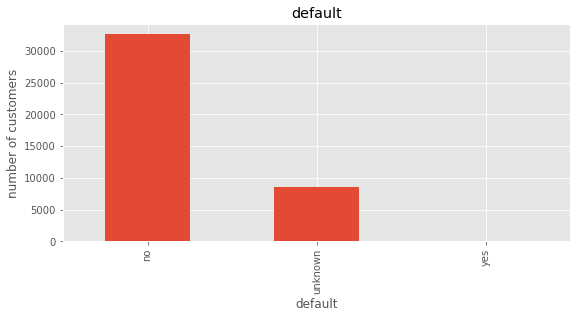

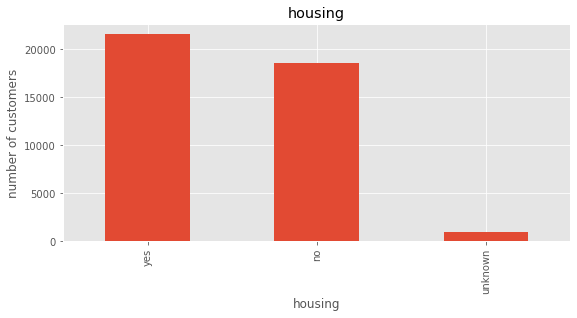

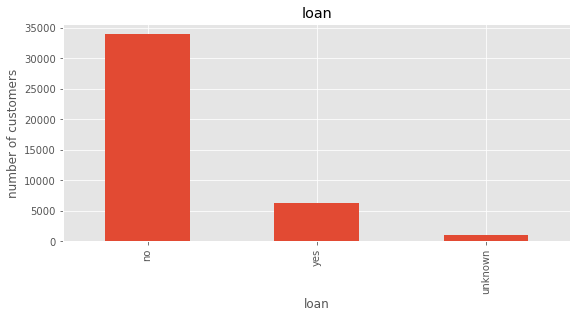

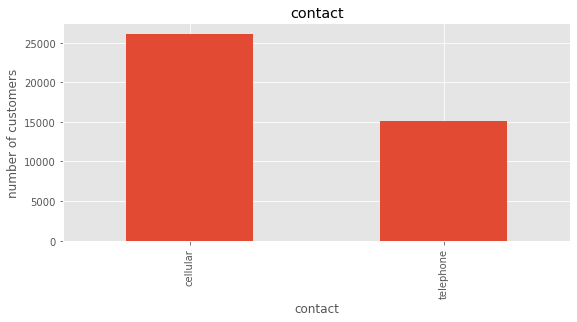

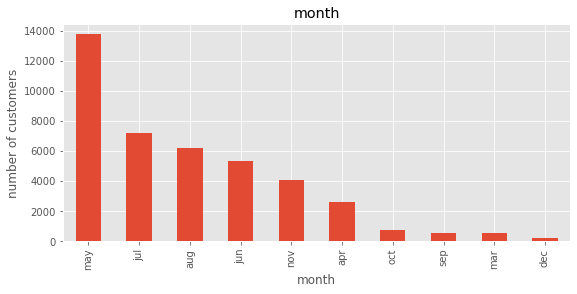

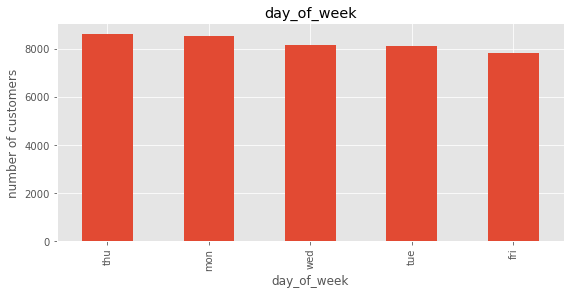

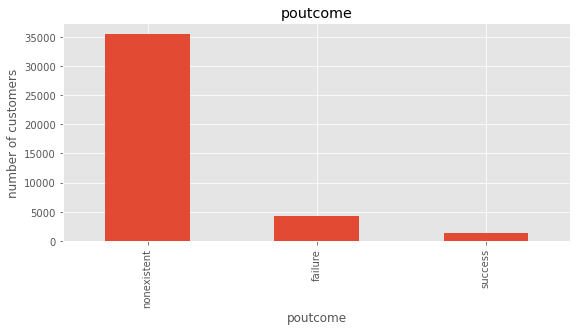

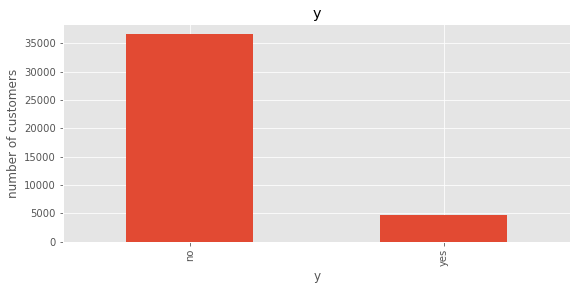

In [17]:
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

## From Graph:

##### In first graph we can say that top three number of customers belong to - admin,blue-collar,technician.
##### Our huge of custemer are married.
##### Majority of most no.of custemer are university-degree.
##### Coustmer do not have any credit.
##### Cellular phones are the most favoured method contacting the customers.
#### Many customers have been contacted in the month of May.

## Missing Values

In [18]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
# replacing 'unknown' with mode
for column in cat_var:
    mode=data[column].mode()[0]
    data[column]=data[column].replace('unknown',mode)

## Univariate analysis of Numerical columns

In [21]:
# indentifying the numerical variables
num_var= data.select_dtypes(include=np.number)
num_var.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

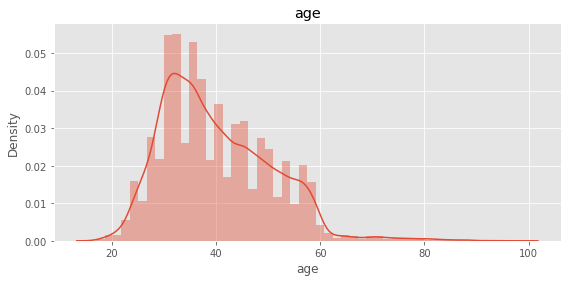

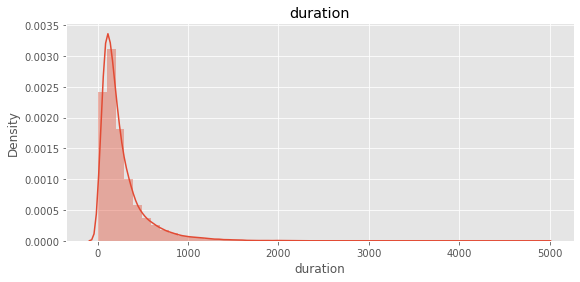

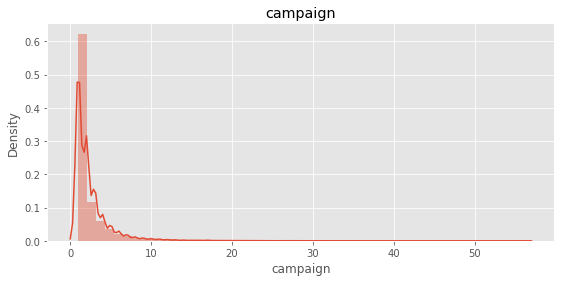

In [22]:
# Ploting histogram for each numerical variable
plt.style.use('ggplot')
for column in ['age','duration','campaign']:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column],kde=True)
    plt.title(column)

from the two graphs of duration and campaign we can see that the graphs postively skewed so there will be some outliers present in the data
Since pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m and nr.employed consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [23]:
data.drop(columns=["pdays", "previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"],axis=1,inplace=True)

## Data Preprocessing

## Checking Outlier

In [24]:
# Outlaier Handaling

In [25]:
box = data[['age','duration','campaign']]


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


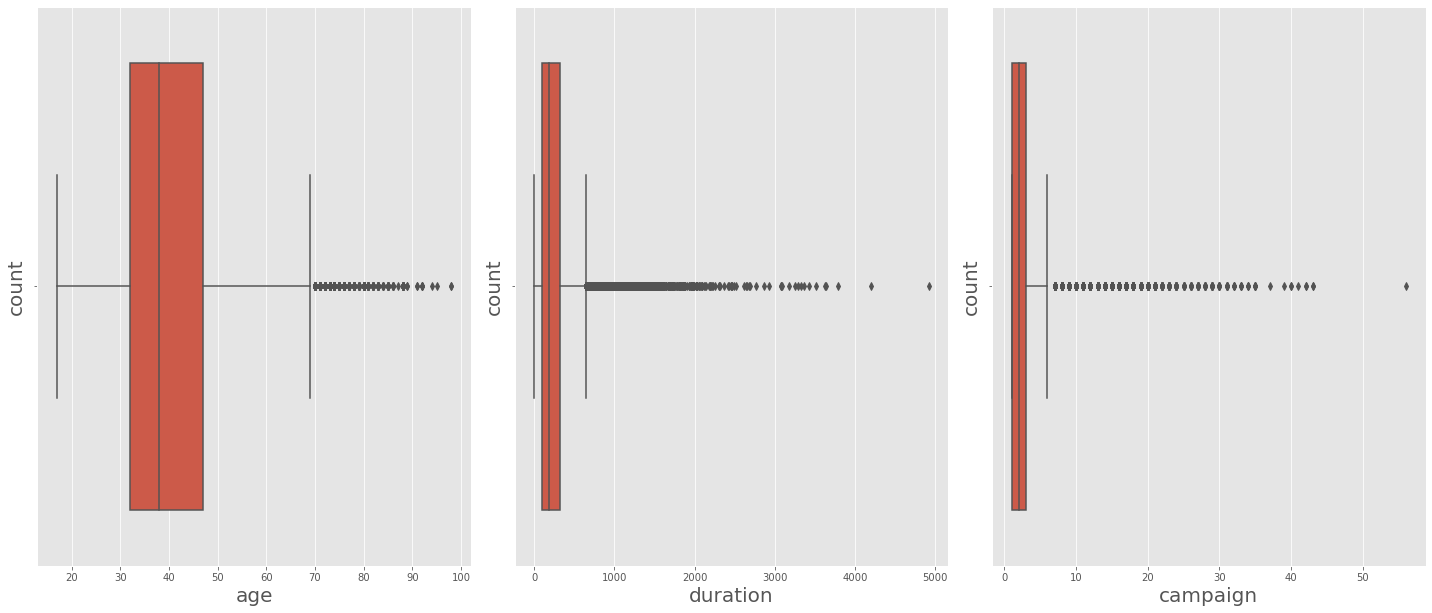

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in box:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(box[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
data.campaign.unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    2
41186    1
41187    3
Name: campaign, Length: 41176, dtype: int64>

## Outlaier Handling

## Age

In [28]:
# Outlaier handling for age is not normal so we use IQR range.
from scipy import stats

In [29]:
IQR=stats.iqr(data.age,interpolation='midpoint')#calculating inter quartile range
IQR

15.0

In [30]:
Q1 =data.age.quantile(0.25)#defining 25% data
Q3=data.age.quantile(0.75)#defining 25% data

min_limit=Q1-1.5*IQR #setting minimum limit
max_limit=Q3+1.5*IQR # setting maximum limit

In [31]:
min_limit

9.5

In [32]:
max_limit

69.5

In [33]:
data.loc[data['age']<min_limit]#cheaking value which are less than minimum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [34]:
data.loc[data['age']>max_limit]# vheaking values which are greater than maximum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,187,3,nonexistent,yes
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,167,9,nonexistent,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,179,1,failure,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,48,1,nonexistent,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,266,2,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,no,yes,yes,cellular,oct,mon,138,4,success,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,621,1,failure,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,411,1,failure,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,nonexistent,yes


In [35]:
#inputing outlaier with mwdian
data.loc[data['age']>max_limit,'age']=np.median(data.age)


In [36]:
data.loc[data['age']>max_limit]#cheking whether outlaier remove or not

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


## Duration

In [37]:
IQR=stats.iqr(data.duration,interpolation='midpoint')#calculating inter quartile range
IQR

217.0

In [38]:
Q1 =data.duration.quantile(0.25)#defining 25% data
Q3=data.duration.quantile(0.75)#defining 25% data

min_limit=Q1-1.5*IQR #setting minimum limit
max_limit=Q3+1.5*IQR # setting maximum limit

In [39]:
min_limit

-223.5

In [40]:
max_limit

644.5

In [41]:
data.loc[data['duration']<min_limit]#cheaking value which are less than minimum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [42]:
data.loc[data['duration']>max_limit]# vheaking values which are greater than maximum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
37,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,1666,1,nonexistent,no
57,45,services,married,high.school,no,yes,no,telephone,may,mon,787,1,nonexistent,no
61,51,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,812,1,nonexistent,no
75,41,blue-collar,divorced,basic.4y,no,yes,no,telephone,may,mon,1575,1,nonexistent,yes
83,49,entrepreneur,married,university.degree,no,yes,no,telephone,may,mon,1042,1,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,technician,single,professional.course,no,yes,no,cellular,nov,fri,712,2,success,yes
41153,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,655,2,success,yes
41160,33,admin.,married,university.degree,no,no,no,cellular,nov,tue,843,1,nonexistent,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,1868,2,success,yes


In [43]:
#inputing outlaier with mwdian
data.loc[data['duration']>max_limit,'duration']=np.median(data.age)


In [44]:
data.loc[data['duration']>max_limit]#cheking whether outlaier remove or not

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


## Campaign

In [45]:
IQR=stats.iqr(data.campaign,interpolation='midpoint')#calculating inter quartile range
IQR

2.0

In [46]:
Q1 =data.campaign.quantile(0.25)#defining 25% data
Q3=data.campaign.quantile(0.75)#defining 25% data

min_limit=Q1-1.5*IQR #setting minimum limit
max_limit=Q3+1.5*IQR # setting maximum limit

In [47]:
min_limit

-2.0

In [48]:
max_limit

6.0

In [49]:
data.loc[data['campaign']<min_limit]#cheaking value which are less than minimum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y


In [50]:
data.loc[data['campaign']>max_limit]# vheaking values which are greater than maximum limit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,388,7,nonexistent,no
1043,41,technician,single,university.degree,no,no,no,telephone,may,wed,79,8,nonexistent,no
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,253,8,nonexistent,no
1097,51,blue-collar,married,basic.4y,no,yes,no,telephone,may,wed,244,7,nonexistent,no
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,521,7,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,38,retired,married,basic.9y,no,no,no,telephone,sep,fri,543,9,failure,no
40631,38,retired,married,basic.4y,no,yes,no,cellular,sep,mon,213,7,nonexistent,no
40698,29,technician,single,professional.course,no,yes,no,cellular,sep,mon,157,7,success,no
40821,33,technician,single,professional.course,no,yes,no,cellular,sep,fri,246,9,failure,no


In [51]:
#inputing outlaier with mwdian
data.loc[data['campaign']>max_limit,'duration']=np.median(data.age)


In [52]:
data.loc[data['campaign']>max_limit]#cheking whether outlaier remove or not

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,38,7,nonexistent,no
1043,41,technician,single,university.degree,no,no,no,telephone,may,wed,38,8,nonexistent,no
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,38,8,nonexistent,no
1097,51,blue-collar,married,basic.4y,no,yes,no,telephone,may,wed,38,7,nonexistent,no
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,38,7,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,38,retired,married,basic.9y,no,no,no,telephone,sep,fri,38,9,failure,no
40631,38,retired,married,basic.4y,no,yes,no,cellular,sep,mon,38,7,nonexistent,no
40698,29,technician,single,professional.course,no,yes,no,cellular,sep,mon,38,7,success,no
40821,33,technician,single,professional.course,no,yes,no,cellular,sep,fri,38,9,failure,no


In [53]:
# without outliers
data.describe()

,age,duration,campaign
count,41176.000000,41176.000000,41176.000000
mean,39.581212,185.658320,2.567879
std,9.621591,142.442432,2.770318
min,17.000000,0.000000,1.000000
25%,32.000000,73.000000,1.000000
50%,38.000000,149.000000,2.000000
75%,47.000000,259.000000,3.000000
max,69.000000,644.000000,56.000000


After replacing the outliers with the upper boundary, the maximum values has been changed without impacting any other parameters like mean, standard deviation and quartiles

## Encoding categorical Features

In [54]:
#categorical features
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [55]:
# check categorical class
for i in cat_var:
    print(i, ":", data[i].unique())

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital : ['married' 'single' 'divorced']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


In [56]:
# initializing label encoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
# iterating through each categorical feature and label encoding them
for feature in cat_var:
    data[feature]=le.fit_transform(data[feature])
    

In [57]:
#label encoder dataset
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,56,3,1,0,0,0,0,1,6,1,261,1,1,0
1,57,7,1,3,0,0,0,1,6,1,149,1,1,0
2,37,7,1,3,0,1,0,1,6,1,226,1,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,1,0
4,56,7,1,3,0,0,1,1,6,1,307,1,1,0


## Separating independant and dependent variables

In [58]:
# feature variables
X= data.iloc[:, :-1]

# target variable
y= data.iloc[:, -1]

## Handaling Imbalanced dataset

Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

In [59]:
!pip install imblearn

In [60]:
## Balancing tne data
from collections import Counter #importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))#cheaking count for each class
X_sm,y_sm=sm.fit_resample(X,y)#apply sampling on target variable
print(Counter(y_sm))# cheaking count after sampling each class


Counter({0: 36537, 1: 4639})
Counter({0: 36537, 1: 36537})


## Feature Selection

<AxesSubplot:>

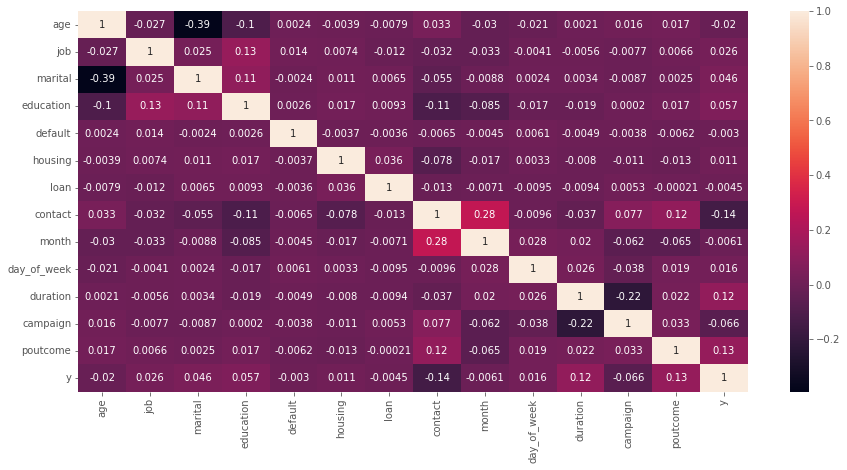

In [61]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.

## Model Creation

In [62]:
## Scaling the data all feature seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()    # Object creation
X_scaled=scalar.fit_transform(X)     # scaling independent variables #we can use minmax scalar,then we will get norminal distribuon data here we are getting standardized data.
#scaling is done by c score by means od finding the difference from mean
#in standaradized data mean will be always one and standard deviation will be zero.


In [63]:
X_scaled

array([[ 1.70647313, -0.17918749, -0.27976366, ...,  0.52893364,
        -0.56596326,  0.19265118],
       [ 1.8104073 ,  0.94773207, -0.27976366, ..., -0.25735846,
        -0.56596326,  0.19265118],
       [-0.26827617,  0.94773207, -0.27976366, ...,  0.28321736,
        -0.56596326,  0.19265118],
       ...,
       [ 1.70647313,  0.38427229, -0.27976366, ...,  0.02346015,
        -0.20498953,  0.19265118],
       [ 0.45926304,  1.51119185, -0.27976366, ...,  1.79963786,
        -0.56596326,  0.19265118],
       [-0.164342  ,  0.38427229, -0.27976366, ...,  0.37448341,
         0.1559842 , -2.56268226]])

In [64]:
# preprocessing training and testing the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.25,random_state=42)

## Using DecisionTreeClassifier

In [65]:
from sklearn.tree import DecisionTreeClassifier  # import decision tree from sklearn.tree
dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')
dt.fit(X_train,y_train)#Training the model
y_hat=dt.predict(X_test)#prediction
y_hat

array([0, 1, 1, ..., 0, 1, 1])

In [66]:
##Evalution for model
from sklearn.metrics import accuracy_score,classification_report,f1_score   # import matrics to check performance
# Training score
y_train_predict=dt.predict(X_train)#passing X_train to predict y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

0.7964419304807956

In [67]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 score and accuracy


              precision    recall  f1-score   support

           0       0.86      0.71      0.78     27334
           1       0.75      0.88      0.81     27471

    accuracy                           0.80     54805
   macro avg       0.81      0.80      0.79     54805
weighted avg       0.81      0.80      0.79     54805



In [68]:
pd.crosstab(y_train,y_train_predict)#it will show confusion matrix


col_0,0,1
y,,
0,19441,7893
1,3263,24208


In [69]:
train_f1=f1_score(y_train,y_train_predict)
train_f1

0.812730813133687

In [70]:
## test accuracy
test_acc=accuracy_score(y_test,y_hat)#f1 score
test_acc

0.7848267557063878

In [71]:
# test score
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.7998370589133865

In [72]:
print(classification_report(y_test,y_hat))#for testing

              precision    recall  f1-score   support

           0       0.84      0.70      0.77      9203
           1       0.74      0.87      0.80      9066

    accuracy                           0.78     18269
   macro avg       0.79      0.79      0.78     18269
weighted avg       0.79      0.78      0.78     18269



In [73]:
pd.crosstab(y_test,y_hat)# confusion matrix for

col_0,0,1
y,,
0,6484,2719
1,1212,7854


## Hyperparameters of DicisionTree

In [74]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [75]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds




tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameter

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [76]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [77]:
tree_cv.best_score_#getting best score from cv

0.8662500956855456

In [78]:
dt.fit(X_train,y_train)#traning model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

In [79]:
y_hat=dt.predict(X_test)#predicting
#y_hat1

In [80]:
acc_test=accuracy_score(y_test,y_hat)#checking accuracy
acc_test

0.7728392358640319

In [81]:
test_f1=f1_score(y_test,y_hat)#f1_score
test_f1

0.7658013544018059

In [82]:
print(classification_report(y_test,y_hat))#it will give precision,accuracy,recall,f1_score

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      9203
           1       0.78      0.75      0.77      9066

    accuracy                           0.77     18269
   macro avg       0.77      0.77      0.77     18269
weighted avg       0.77      0.77      0.77     18269



[Text(0.6457256807742782, 0.9545454545454546, 'X[7] <= 0.827\nentropy = 1.0\nsamples = 54805\nvalue = [27334, 27471]'),
 Text(0.451289780183727, 0.8636363636363636, 'X[6] <= 0.053\nentropy = 0.967\nsamples = 42196\nvalue = [16618, 25578]'),
 Text(0.27097687007874016, 0.7727272727272727, 'X[5] <= 0.991\nentropy = 0.945\nsamples = 38688\nvalue = [14037, 24651]'),
 Text(0.13463746719160105, 0.6818181818181818, 'X[8] <= 1.605\nentropy = 0.855\nsamples = 21777\nvalue = [6097, 15680]'),
 Text(0.06373031496062992, 0.5909090909090909, 'X[8] <= 0.854\nentropy = 0.939\nsamples = 5726\nvalue = [2035, 3691]'),
 Text(0.026246719160104987, 0.5, 'X[9] <= 1.877\nentropy = 0.782\nsamples = 2341\nvalue = [544, 1797]'),
 Text(0.010498687664041995, 0.4090909090909091, 'X[2] <= 0.128\nentropy = 0.89\nsamples = 1026\nvalue = [315, 711]'),
 Text(0.006561679790026247, 0.3181818181818182, 'X[1] <= 0.625\nentropy = 0.702\nsamples = 184\nvalue = [35, 149]'),
 Text(0.003937007874015748, 0.22727272727272727, 'X[10

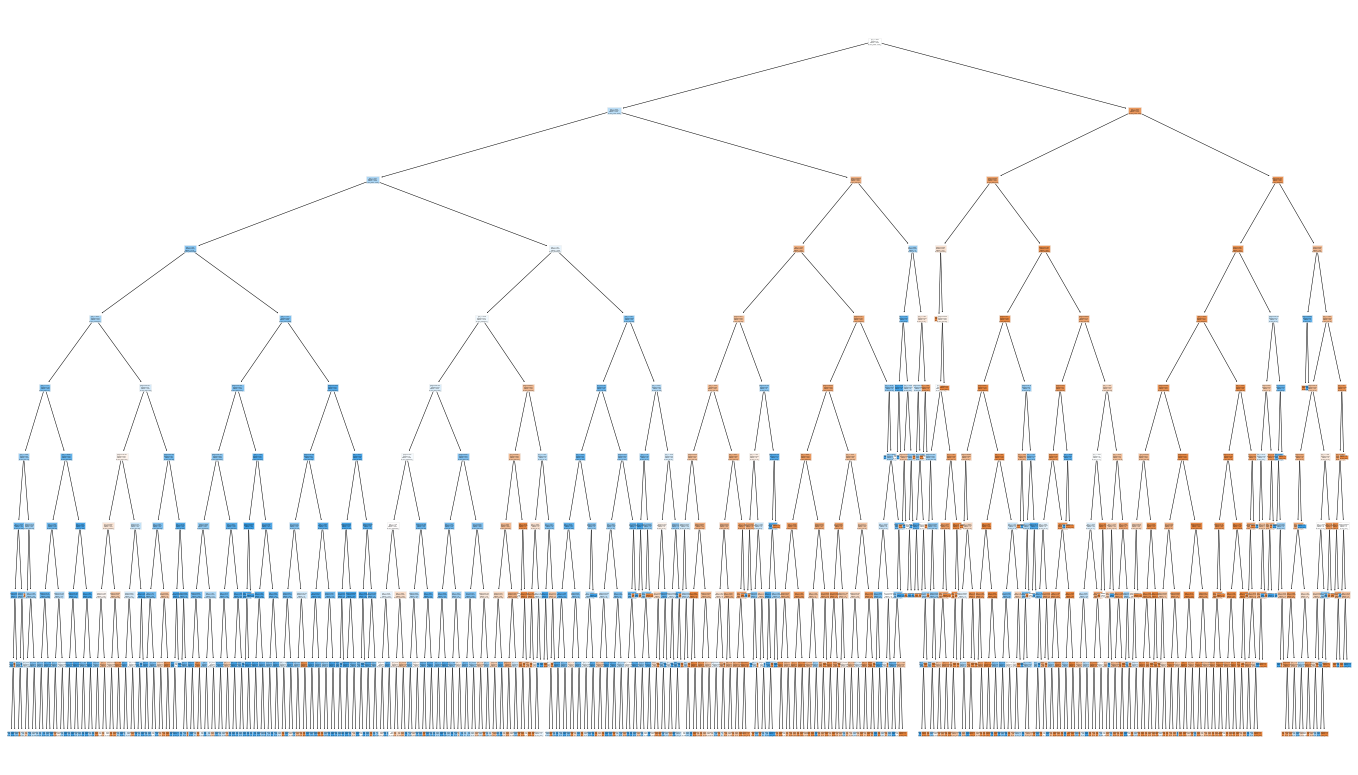

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.tree import plot_tree
plt.figure(figsize=(24,14))
plot_tree(dt,filled=True)

## Using logistic regression

In [84]:
## Model Creation
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()    # objest creation for logistic regression
log_reg.fit(X_train,y_train)      # training model with training data


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
y_train_pre=log_reg.predict(X_train)   #predicing y train


In [87]:
y_pred =log_reg.predict(X_test)  #predicting y test

In [89]:
y_train.shape # to know the shape of y_train(rows and column)

(54805,)

In [90]:
y_pred.shape # to know the shape of y_predict(rows and column)

(18269,)

In [91]:

# Evaluating the model

from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report, roc_curve, roc_auc_score

In [94]:
## calculating accuracy for training set
accuracy=accuracy_score(y_train,y_train_pre)# Model training accuracy.......true positive,true negative
accuracy

0.7084207645287839

In [95]:
accuracy=accuracy_score(y_test,y_pred)#Model training accuracy
accuracy

0.7095079095735947

In [97]:
#precision
Precision = precision_score(y_test,y_pred)# the number of true positive divided by the total number of positive prediction
Precision

0.6895612708018154

In [98]:
# Recall (recall varies 0.0 to 1.0)
Recall=recall_score(y_test,y_pred)# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.7541363335539378

In [99]:
# F1 score
F1_score= f1_score(y_test,y_pred)# when precision and recall both are important ,average of recall and precision.
F1_score

0.7204046151414573

In [100]:
## confusion matrix
pd.crosstab(y_test,y_pred)

col_0,0,1
y,,
0,6125,3078
1,2229,6837


In [101]:
report=classification_report(y_test,y_pred)# it will give precision,recall,f1_score and accuracy
print(report)

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      9203
           1       0.69      0.75      0.72      9066

    accuracy                           0.71     18269
   macro avg       0.71      0.71      0.71     18269
weighted avg       0.71      0.71      0.71     18269



In [103]:
# Area under curve # thise is to compare algorithum
auc=roc_auc_score(y_test,y_pred)
auc

0.7098400889762517

## Hyper Parameter

In [111]:
from sklearn.model_selection import GridSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [112]:
from sklearn.model_selection import StratifiedKFold

In [118]:
# selecting the classifier
log_reg=LogisticRegression()
# selecting hyperparameter tuning
log_param={"C": 10.0**np.arange(-2,3), "penalty":["l1","l2"]}
# defining startified Kfold cross validation
cv_log=StratifiedKFold(n_splits=5)
# using gridsearch for respective parameters
gridsearch_log=GridSearchCV(log_reg,log_param,cv=cv_log,scoring="f1_macro",n_jobs=-1,verbose=2)

#fitting  the model on resampled data
gridsearch_log.fit(X_train, y_train)

# printing best score and best parameters
print("best score is:"  ,gridsearch_log.best_score_)
print("best parameters are:"  ,gridsearch_log.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solv

best score is: 0.7117353039852575
best parameters are: {'C': 10.0, 'penalty': 'l2'}


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[6072 3131]
 [2139 6927]]
0.711533198314084
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      9203
           1       0.69      0.76      0.72      9066

    accuracy                           0.71     18269
   macro avg       0.71      0.71      0.71     18269
weighted avg       0.71      0.71      0.71     18269



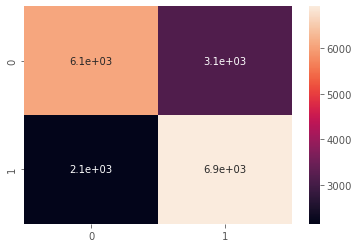

In [119]:
# checking model performance
y_predicted= gridsearch_log.predict(X_test)
cm= confusion_matrix(y_test,y_predicted)
print(cm)
sns.heatmap(cm,annot=True)
print(accuracy_score(y_test,y_predicted))
print(classification_report(y_test,y_predicted))

## Using RandomForestClassifier and Hyperparameter tuning

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [126]:
# random forest
rf= RandomForestClassifier()

rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
#            "max_depth": [4,5,6,7,8],
           "max_depth": [int(x) for x in np.linspace(start=5, stop=30, num=6)],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

cv_rf= StratifiedKFold(n_splits=5)

randomsearch_rf= RandomizedSearchCV(rf, rf_param, cv=cv_rf, scoring= "f1_macro", n_jobs=-1, verbose=2, n_iter=10)

randomsearch_rf.fit(X_train, y_train)

print("best score is:", randomsearch_rf.best_score_)
print("best parameters are:", randomsearch_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score is: 0.9088221519896538
best parameters are: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy'}


[[8187 1016]
 [ 561 8505]]
0.9136789096283321
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      9203
           1       0.89      0.94      0.92      9066

    accuracy                           0.91     18269
   macro avg       0.91      0.91      0.91     18269
weighted avg       0.91      0.91      0.91     18269



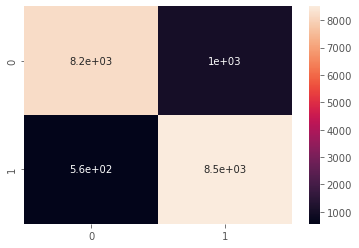

In [129]:
# checking model performance
y_predicted_rf=randomsearch_rf.predict(X_test)

print(confusion_matrix(y_test,y_predicted_rf))
sns.heatmap(confusion_matrix(y_test,y_predicted_rf),annot=True)
print(accuracy_score(y_test,y_predicted_rf))
print(classification_report(y_test,y_predicted_rf))

## Conclustion

Based on our data analysis, we decided to drop default, pdays, previous, day_of_week, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed.

Based on correlation between numerical values on social & economic attributes, we found that there are few strong correlation between each variable.

We tried 3 difference models as our first step in modelling process, to evaluate & choose the best model as our baseline model.

Our model focused on recall or where we will minimize false negative class - where we predicted clients that will not open a term deposit, turns out they actually want to open a term deposit.

The datset was a imbalance dataset. so we balanced the dataset

Based on the result, we found out that RandomForest Classifer with highest Recall 0.90 or 90%

We are able to minimize False Negative rate by maximizing our evaluation metric which is Recall by 90%.

 